# K-Nearest Neighbours

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error

import helper

In [14]:

X_train, X_test, y_train, y_test = helper.get_test_train_split()


In [15]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [16]:

y_pred = knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(helper.revenue_exp(y_test), helper.revenue_exp(y_pred)))

print(f'{rmse = :.2f}') 


rmse = 90170181.22


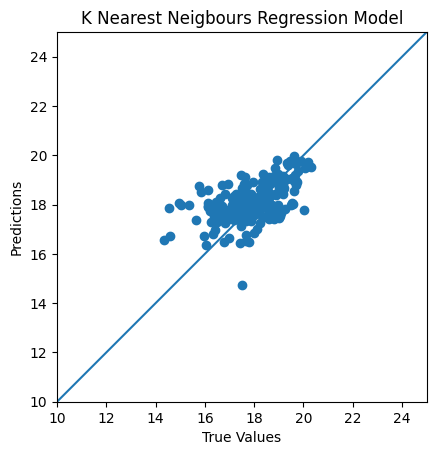

In [17]:
plt.scatter(y_test, y_pred)
plt.title('K Nearest Neigbours Regression Model')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([10,25])
plt.ylim([10,25])
_ = plt.plot([-100, 100], [-100, 100])

In [18]:
ratio = helper.revenue_exp(y_test) / helper.revenue_exp(y_pred)
print(ratio.describe())


for i in range(10,20):
    print(f'{y_test.iloc[i]:.2f} -> {y_pred[i]:.2f} -> {ratio.iloc[i]:.2f}')

count    2.060000e+02
mean     1.303972e+00
std      1.541223e+00
min      1.582920e-07
25%      4.687553e-01
50%      9.395194e-01
75%      1.533506e+00
max      1.584282e+01
Name: revenue, dtype: float64
18.17 -> 18.16 -> 1.01
20.07 -> 19.50 -> 1.78
18.51 -> 18.17 -> 1.41
18.38 -> 18.02 -> 1.42
16.70 -> 17.92 -> 0.29
16.04 -> 16.36 -> 0.73
17.27 -> 17.71 -> 0.65
17.49 -> 17.14 -> 1.41
17.88 -> 17.91 -> 0.97
17.21 -> 17.89 -> 0.50


1: rmse = 130258971.69
2: rmse = 101361588.10
3: rmse = 97442020.94
4: rmse = 93740596.72
5: rmse = 90170181.22
6: rmse = 89974038.76
7: rmse = 91024190.14
8: rmse = 93961484.32
9: rmse = 92296578.05
10: rmse = 92062528.42
11: rmse = 92652403.36
12: rmse = 92281263.51
13: rmse = 92761206.12
14: rmse = 93031767.85
15: rmse = 93688360.02
16: rmse = 94524685.69
17: rmse = 95135427.12
18: rmse = 94915152.42
19: rmse = 94754623.80
20: rmse = 94962376.02
21: rmse = 94402546.47
22: rmse = 94632072.93
23: rmse = 94328700.75
24: rmse = 94932907.83
25: rmse = 94975038.19
26: rmse = 94683491.40
27: rmse = 94997662.68
28: rmse = 95287547.72
29: rmse = 95569138.56
30: rmse = 95172176.14
31: rmse = 95070879.59
32: rmse = 95057925.06
33: rmse = 95532384.59
34: rmse = 95742207.39
35: rmse = 95500088.74
36: rmse = 96041480.67
37: rmse = 96521307.96
38: rmse = 96642067.70
39: rmse = 96843253.37
40: rmse = 96913952.56
41: rmse = 97006306.33
42: rmse = 97507611.16
43: rmse = 97029187.63
44: rmse = 9707463

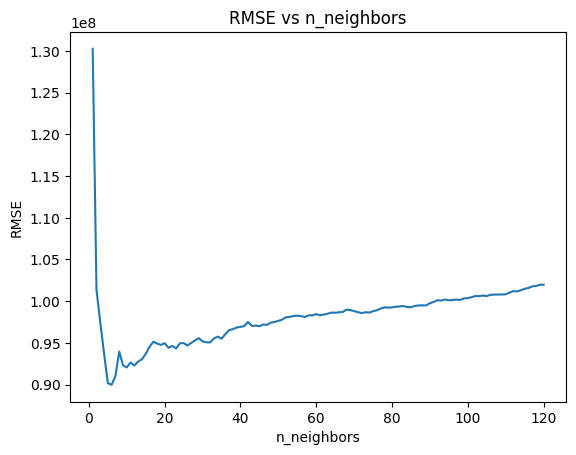

In [42]:
res = []
for i in range(20):
    knn = KNeighborsRegressor(n_neighbors=i+1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(helper.revenue_exp(y_test), helper.revenue_exp(y_pred)))
    print(f'{i+1 }: {rmse = :.2f}')
    res.append(rmse)
print(res)
indexes = range(1,21)
# graph rmse vs n_neighbors

plt.plot(indexes, res)
plt.title('RMSE vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('RMSE')
plt.show()





